In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from joblib import dump, load

C:\Users\ishaa\AppData\Local\Temp\ipykernel_11352\2966530366.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
path = os.chdir("D:\\OneDrive\\Nexus\\New Beginning\\Internships\\Mentorness\\Task 2\\Dataset\\")
data = pd.read_csv("Salary Prediction of Data Professions.csv")
data.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


EXPLORATORY DATA ANALYSIS

In [3]:
data.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2636.000000,2639.000000,2636.000000,2637.000000,2637.000000,2639.000000
mean,24.756449,58136.678287,22.501517,7.503223,3.486159,1.566881
std,3.908228,36876.956944,4.604469,4.603193,1.114933,2.728416
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43418.000000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46781.000000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,51401.500000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


In [4]:
data.isna().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

In [5]:
departments = []
for _ in data["UNIT"].unique() :
   departments.append(_)
   print(_)

Finance
Web
IT
Operations
Marketing
Management


In [6]:
designations = []
for _ in data["DESIGNATION"].unique():
    designations.append(_)
    print(_)

Analyst
Associate
Senior Analyst
Senior Manager
Manager
Director


In [7]:
numerical_att = ["AGE", "SALARY", "LEAVES USED", "LEAVES REMAINING", "RATINGS", "PAST EXP"]
d = data[numerical_att]

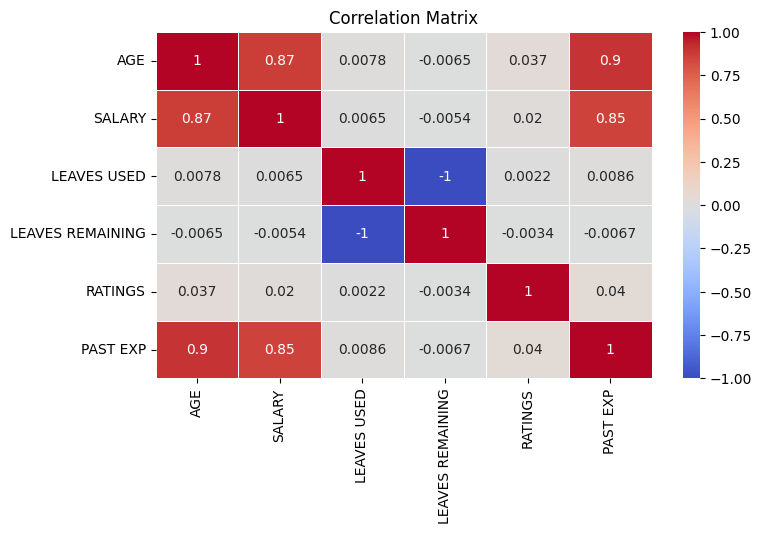

In [8]:
plt.figure(figsize = (8,4.5))
cor_mat = d.corr()
sns.heatmap(cor_mat, annot = True, cmap = "coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

FEATURE ENGINEERING

In [9]:
data.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [10]:
data = data.drop(["FIRST NAME", "LAST NAME"], axis=1)
data.head()

,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [11]:
data["SEX"] = data["SEX"].map({"F": 0, "M":1})
data.head()

,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,0,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,0,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,0,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,0,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,1,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [12]:
data["DOJ"] = pd.to_datetime(data["DOJ"])
data["CURRENT DATE"] = pd.to_datetime(data["CURRENT DATE"])
data["TIME PERIOD"] = data["CURRENT DATE"] - data["DOJ"]
data = data.drop(["DOJ", "CURRENT DATE"], axis=1)
data.head()

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,TIME PERIOD
0,0,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,599 days
1,0,Associate,NaN,89207,Web,NaN,13.0,NaN,7,NaT
2,0,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,528 days
3,0,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,1009 days
4,1,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3,413 days


In [13]:
associates = data[data["DESIGNATION"] == "Associate"]
print("Mean Associate Days: ",np.floor(associates["TIME PERIOD"].dt.days.mean()))

Mean Associate Days:  1104.0


In [14]:
data["TIME PERIOD"] = data["TIME PERIOD"].fillna(associates["TIME PERIOD"].mean())
data.head()

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,TIME PERIOD
0,0,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,599 days 00:00:00
1,0,Associate,NaN,89207,Web,NaN,13.0,NaN,7,1104 days 08:57:43.291139248
2,0,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,528 days 00:00:00
3,0,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,1009 days 00:00:00
4,1,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3,413 days 00:00:00


In [15]:
data[data["AGE"].isna()]

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,TIME PERIOD
1,0,Associate,NaN,89207,Web,NaN,13.0,NaN,7,1104 days 08:57:43.291139248
4,1,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3,413 days 00:00:00
7,1,Analyst,NaN,40058,Marketing,29.0,1.0,2.0,2,763 days 00:00:00


In [16]:
analysts = data[data["DESIGNATION"] == "Analyst"]
associates["AGE"].mean()
print("Associate Mean age : " + str(np.round(associates["AGE"].mean())))
print("Analyst Mean age : " + str(np.round(analysts["AGE"].mean())))

Associate Mean age : 30.0
Analyst Mean age : 23.0


In [17]:
data["AGE"] = data["AGE"].fillna(round(associates["AGE"].mean()), limit = 1)
data["AGE"] = data["AGE"].fillna(round(analysts["AGE"].mean(),0))
data.head(5)

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,TIME PERIOD
0,0,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,599 days 00:00:00
1,0,Associate,30.0,89207,Web,NaN,13.0,NaN,7,1104 days 08:57:43.291139248
2,0,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,528 days 00:00:00
3,0,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,1009 days 00:00:00
4,1,Analyst,23.0,43161,Operations,27.0,3.0,NaN,3,413 days 00:00:00


In [18]:
data["LEAVES USED"] = data["LEAVES USED"].fillna(30 - data["LEAVES REMAINING"])
data = data.drop("LEAVES REMAINING", axis = 1)
data.head()

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,RATINGS,PAST EXP,TIME PERIOD
0,0,Analyst,21.0,44570,Finance,24.0,2.0,0,599 days 00:00:00
1,0,Associate,30.0,89207,Web,17.0,NaN,7,1104 days 08:57:43.291139248
2,0,Analyst,21.0,40955,Finance,23.0,3.0,0,528 days 00:00:00
3,0,Analyst,22.0,45550,IT,22.0,3.0,0,1009 days 00:00:00
4,1,Analyst,23.0,43161,Operations,27.0,NaN,3,413 days 00:00:00


In [19]:
data[data["RATINGS"].isna()]

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,RATINGS,PAST EXP,TIME PERIOD
1,0,Associate,30.0,89207,Web,17.0,NaN,7,1104 days 08:57:43.291139248
4,1,Analyst,23.0,43161,Operations,27.0,NaN,3,413 days 00:00:00


In [20]:
data["RATINGS"] = data["RATINGS"].fillna(np.round(associates["RATINGS"].mean()),limit = 1)
data["RATINGS"] = data["RATINGS"].fillna(np.round(analysts["RATINGS"].mean()))

In [21]:
data.head()

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,RATINGS,PAST EXP,TIME PERIOD
0,0,Analyst,21.0,44570,Finance,24.0,2.0,0,599 days 00:00:00
1,0,Associate,30.0,89207,Web,17.0,3.0,7,1104 days 08:57:43.291139248
2,0,Analyst,21.0,40955,Finance,23.0,3.0,0,528 days 00:00:00
3,0,Analyst,22.0,45550,IT,22.0,3.0,0,1009 days 00:00:00
4,1,Analyst,23.0,43161,Operations,27.0,3.0,3,413 days 00:00:00


In [22]:
data.describe()

,SEX,AGE,SALARY,LEAVES USED,RATINGS,PAST EXP,TIME PERIOD
count,2639.000000,2639.000000,2639.000000,2639.000000,2639.00000,2639.000000,2639
mean,0.490716,24.757105,58136.678287,22.496400,3.48579,1.566881,800 days 19:13:43.896662048
std,0.500009,3.907638,36876.956944,4.604433,1.11459,2.728416,328 days 01:08:58.000514200
min,0.000000,21.000000,40001.000000,15.000000,2.00000,0.000000,341 days 00:00:00
25%,0.000000,22.000000,43418.000000,19.000000,2.00000,0.000000,550 days 00:00:00
50%,0.000000,24.000000,46781.000000,22.000000,3.00000,1.000000,765 days 00:00:00
75%,1.000000,25.000000,51401.500000,26.000000,4.00000,2.000000,977 days 00:00:00
max,1.000000,45.000000,388112.000000,30.000000,5.00000,23.000000,2540 days 00:00:00


In [23]:
data["TIME PERIOD"] = data["TIME PERIOD"].dt.days
data["TIME PERIOD"] = data["TIME PERIOD"].astype(int)
data["YEARS"] = data["TIME PERIOD"] / 365.25
data = data.drop("TIME PERIOD", axis=1)
data.to_csv("data.csv")
data.head()

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,RATINGS,PAST EXP,YEARS
0,0,Analyst,21.0,44570,Finance,24.0,2.0,0,1.639973
1,0,Associate,30.0,89207,Web,17.0,3.0,7,3.022587
2,0,Analyst,21.0,40955,Finance,23.0,3.0,0,1.445585
3,0,Analyst,22.0,45550,IT,22.0,3.0,0,2.762491
4,1,Analyst,23.0,43161,Operations,27.0,3.0,3,1.130732


In [24]:
data = pd.get_dummies(data, columns=["DESIGNATION", "UNIT"])
cor_mat = data.corr()
cor_mat["SALARY"].sort_values(ascending=True)

DESIGNATION_Analyst          -0.597900
UNIT_Operations              -0.032169
SEX                          -0.027798
UNIT_Web                     -0.011194
LEAVES USED                   0.005437
UNIT_Finance                  0.005656
UNIT_IT                       0.010749
UNIT_Management               0.012480
UNIT_Marketing                0.014294
DESIGNATION_Senior Analyst    0.018900
RATINGS                       0.020171
DESIGNATION_Associate         0.199613
DESIGNATION_Manager           0.328848
YEARS                         0.437378
DESIGNATION_Senior Manager    0.507052
DESIGNATION_Director          0.687627
PAST EXP                      0.854046
AGE                           0.872245
SALARY                        1.000000
Name: SALARY, dtype: float64

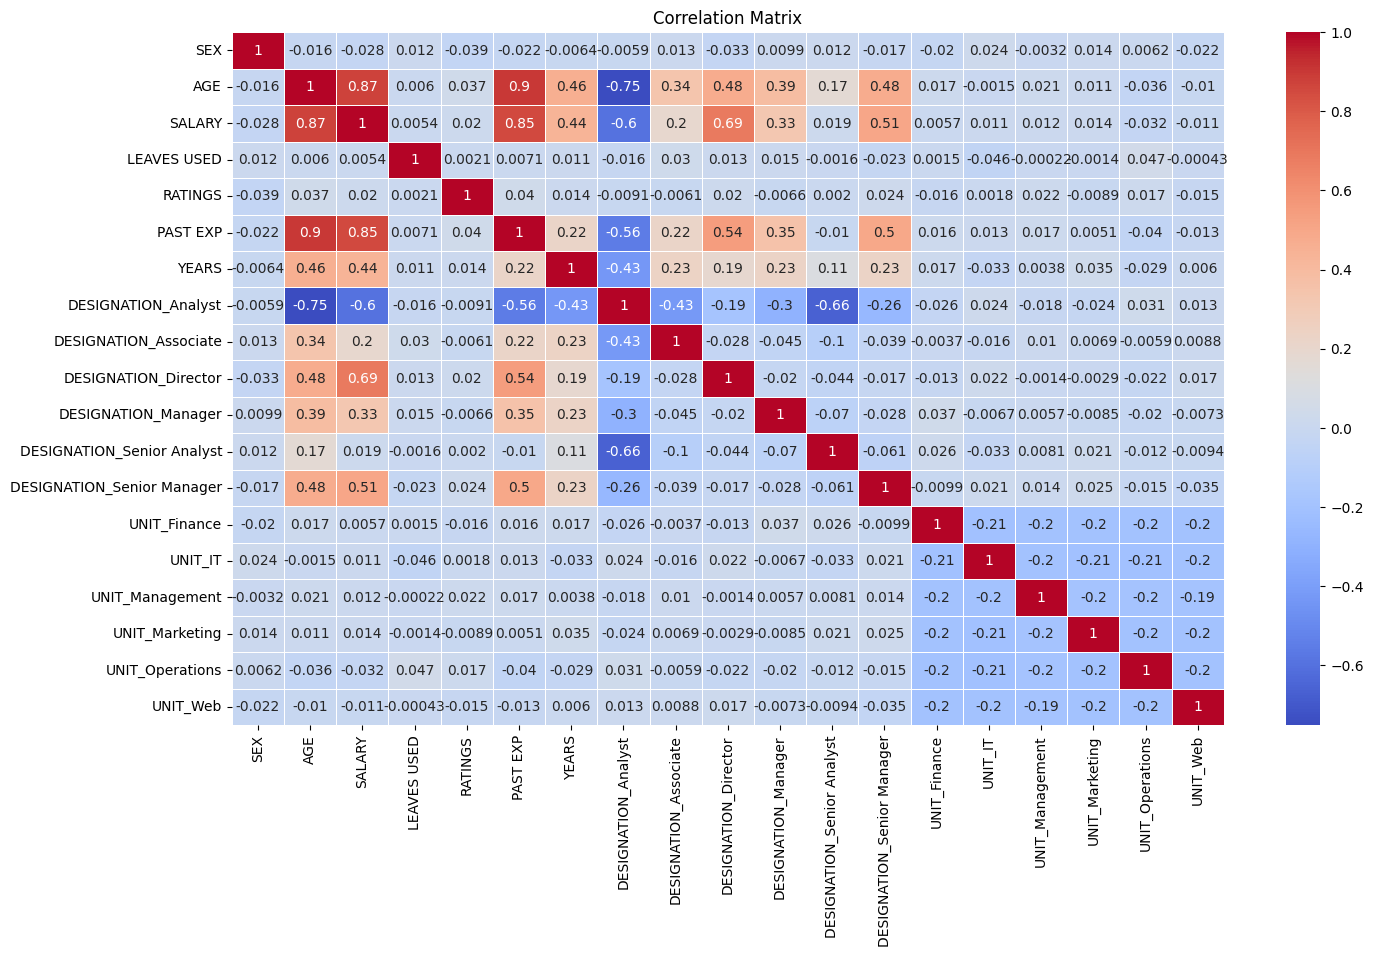

In [25]:
plt.figure(figsize = (16,9))
cor_mat = data.corr()
sns.heatmap(cor_mat, annot = True, cmap = "coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [26]:
data["Associate/Manager/Senior Analyst"] = data["DESIGNATION_Associate"] + data["DESIGNATION_Manager"] + data["DESIGNATION_Senior Analyst"]

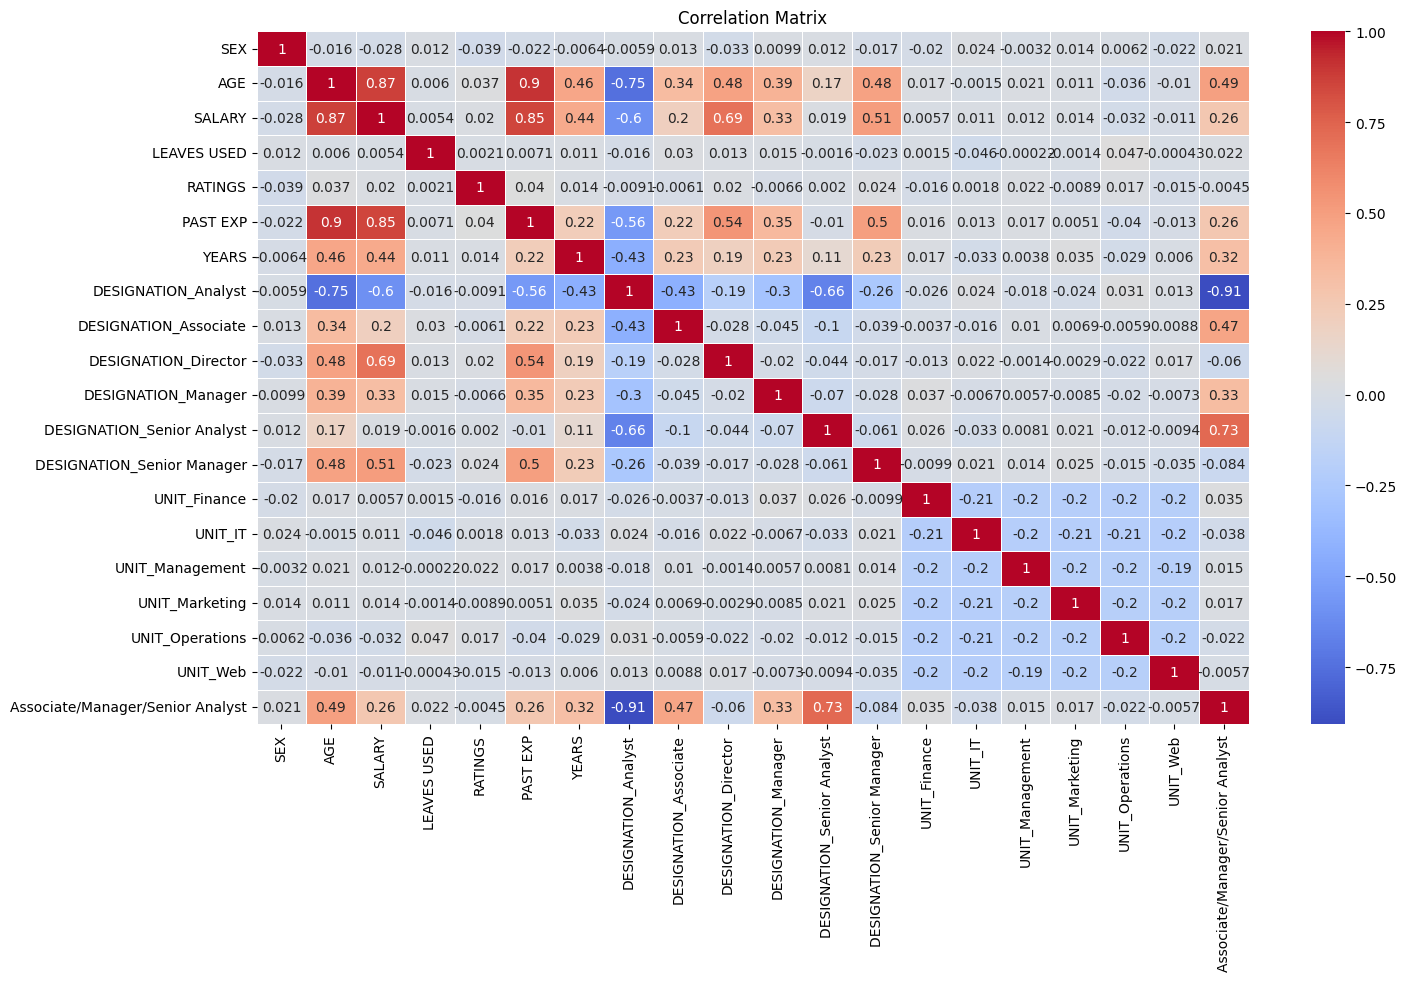

In [27]:
plt.figure(figsize = (16,9))
cor_mat = data.corr()
sns.heatmap(cor_mat, annot = True, cmap = "coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

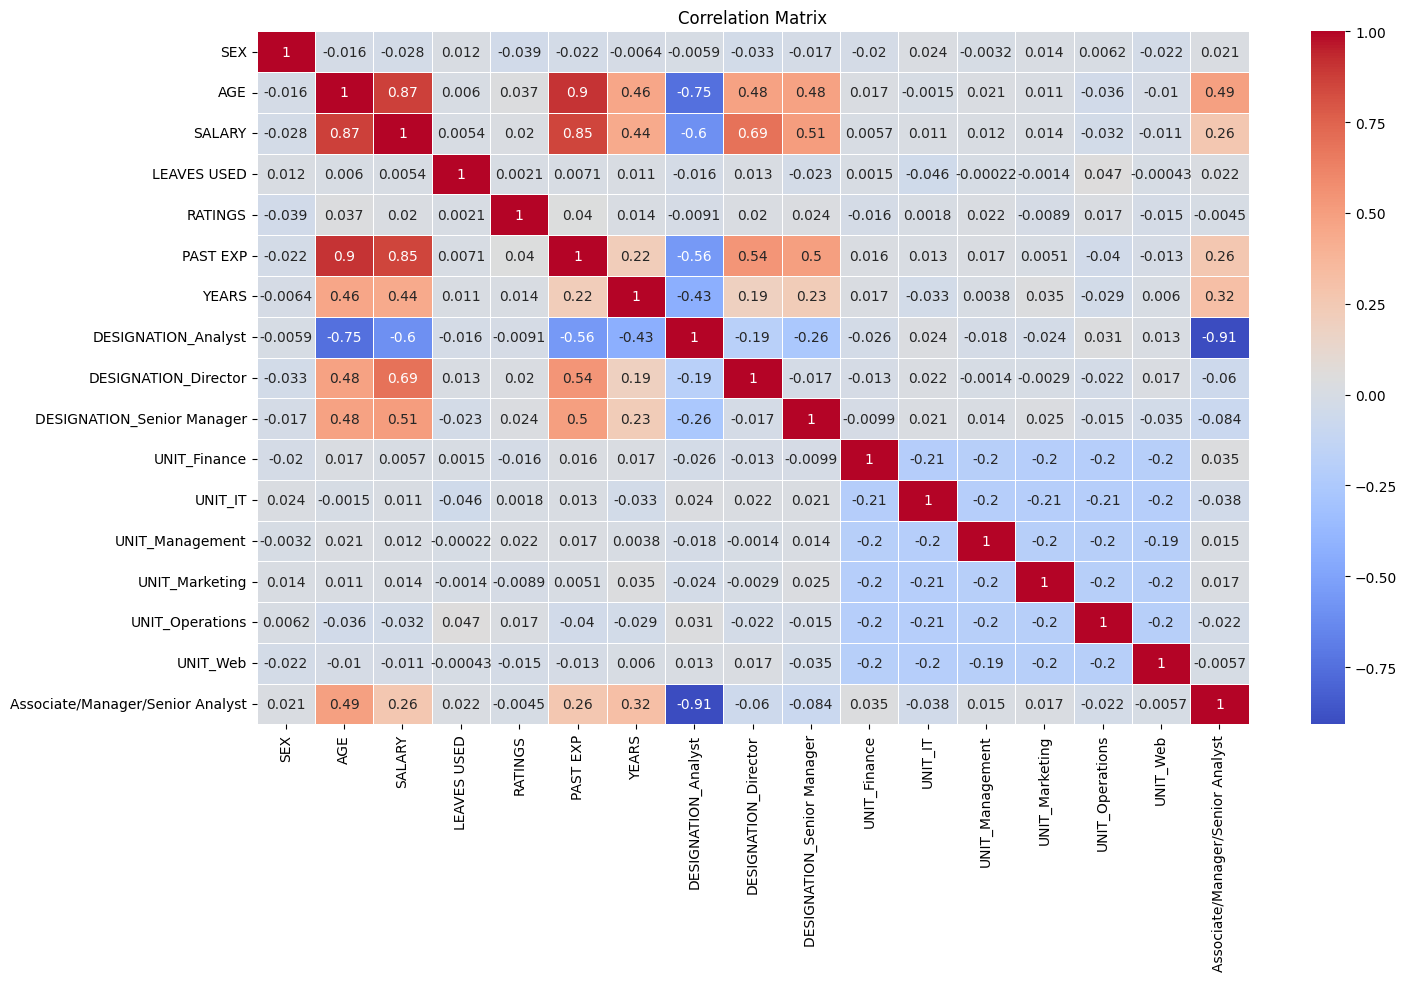

In [28]:
data = data.drop(["DESIGNATION_Associate", "DESIGNATION_Manager", "DESIGNATION_Senior Analyst"], axis=1)
plt.figure(figsize = (16,9))
cor_mat = data.corr()
sns.heatmap(cor_mat, annot = True, cmap = "coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

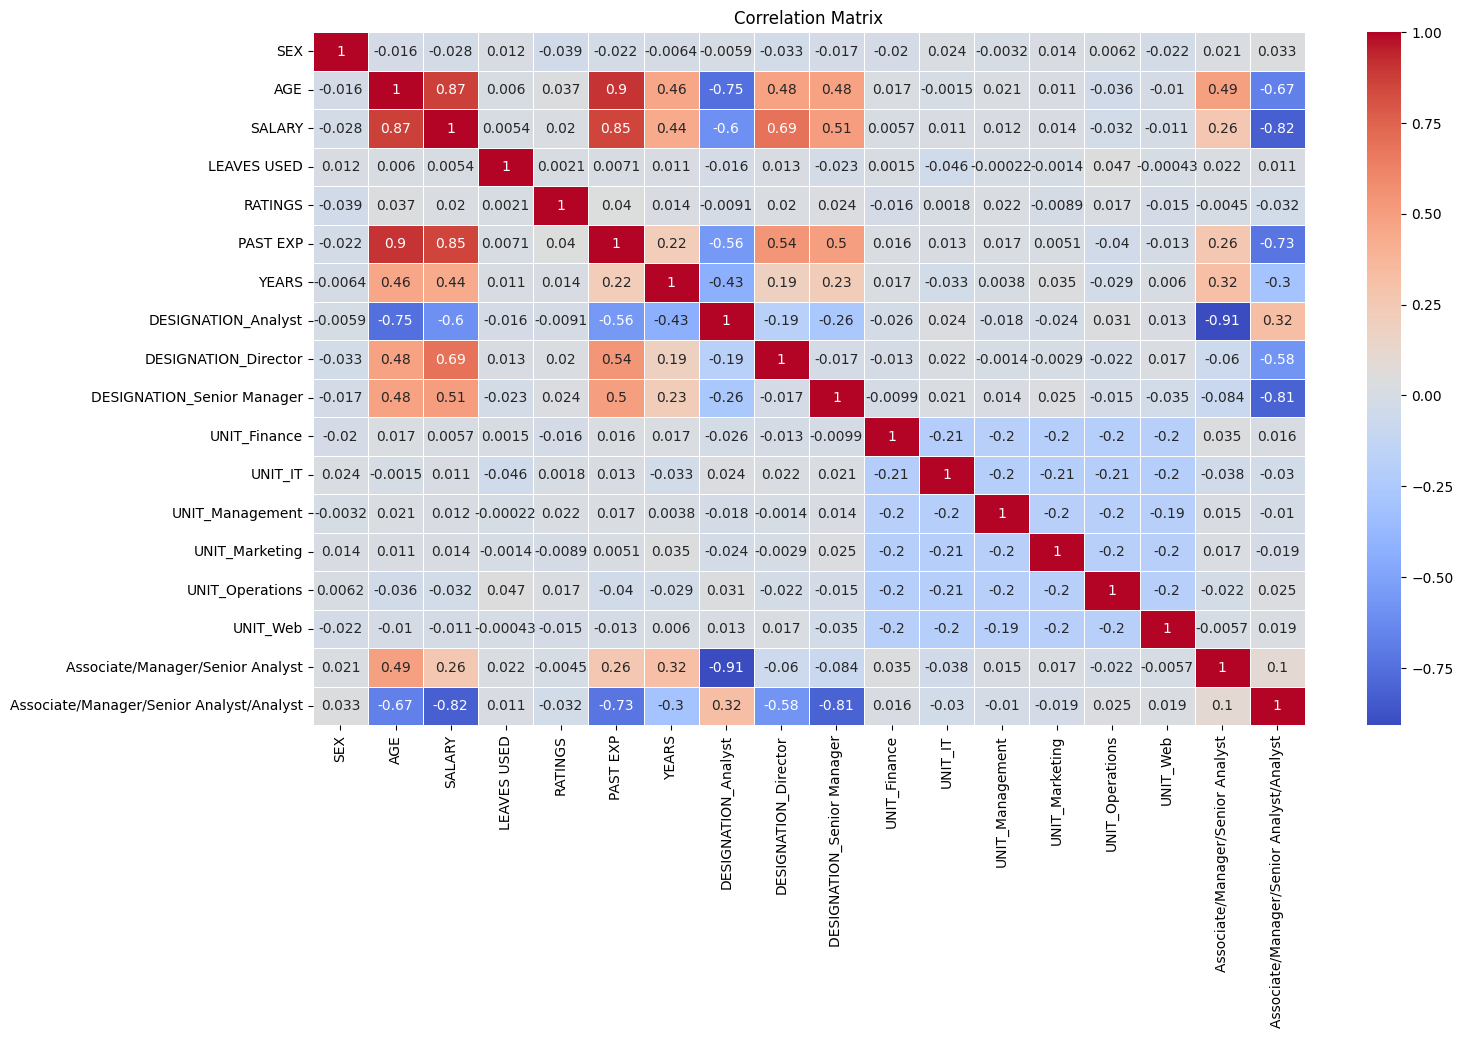

In [29]:
data["Associate/Manager/Senior Analyst/Analyst"] = data["Associate/Manager/Senior Analyst"] + data["DESIGNATION_Analyst"]
plt.figure(figsize = (16,9))
cor_mat = data.corr()
sns.heatmap(cor_mat, annot = True, cmap = "coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

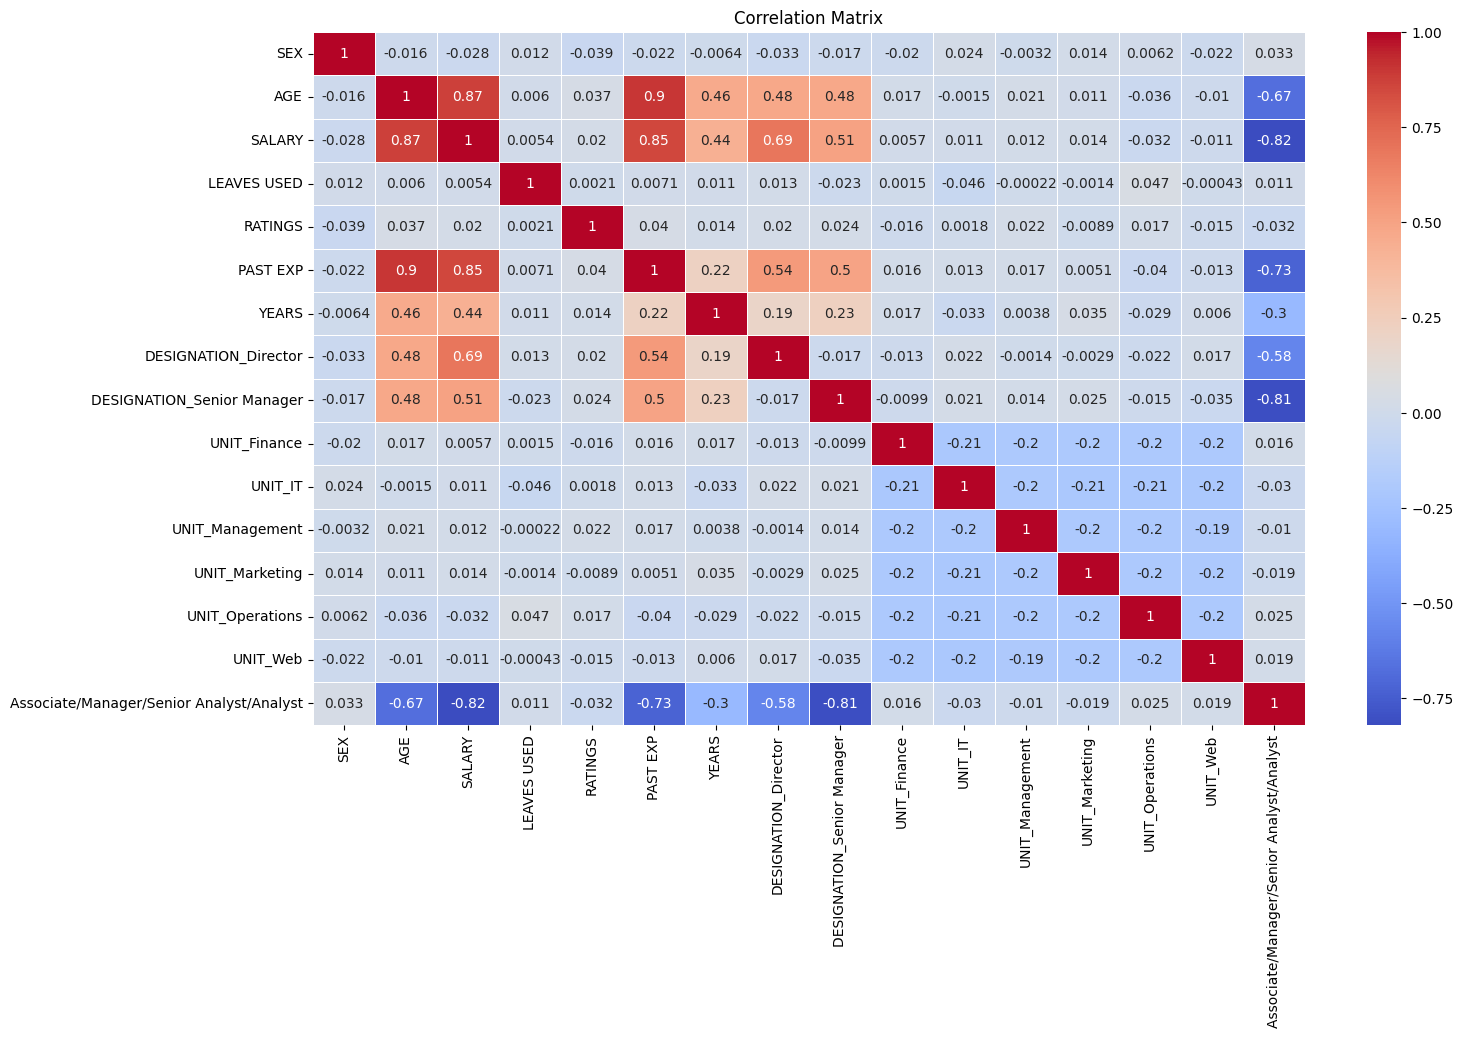

In [30]:
data = data.drop(["Associate/Manager/Senior Analyst", "DESIGNATION_Analyst"], axis=1)
plt.figure(figsize = (16,9))
cor_mat = data.corr()
sns.heatmap(cor_mat, annot = True, cmap = "coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

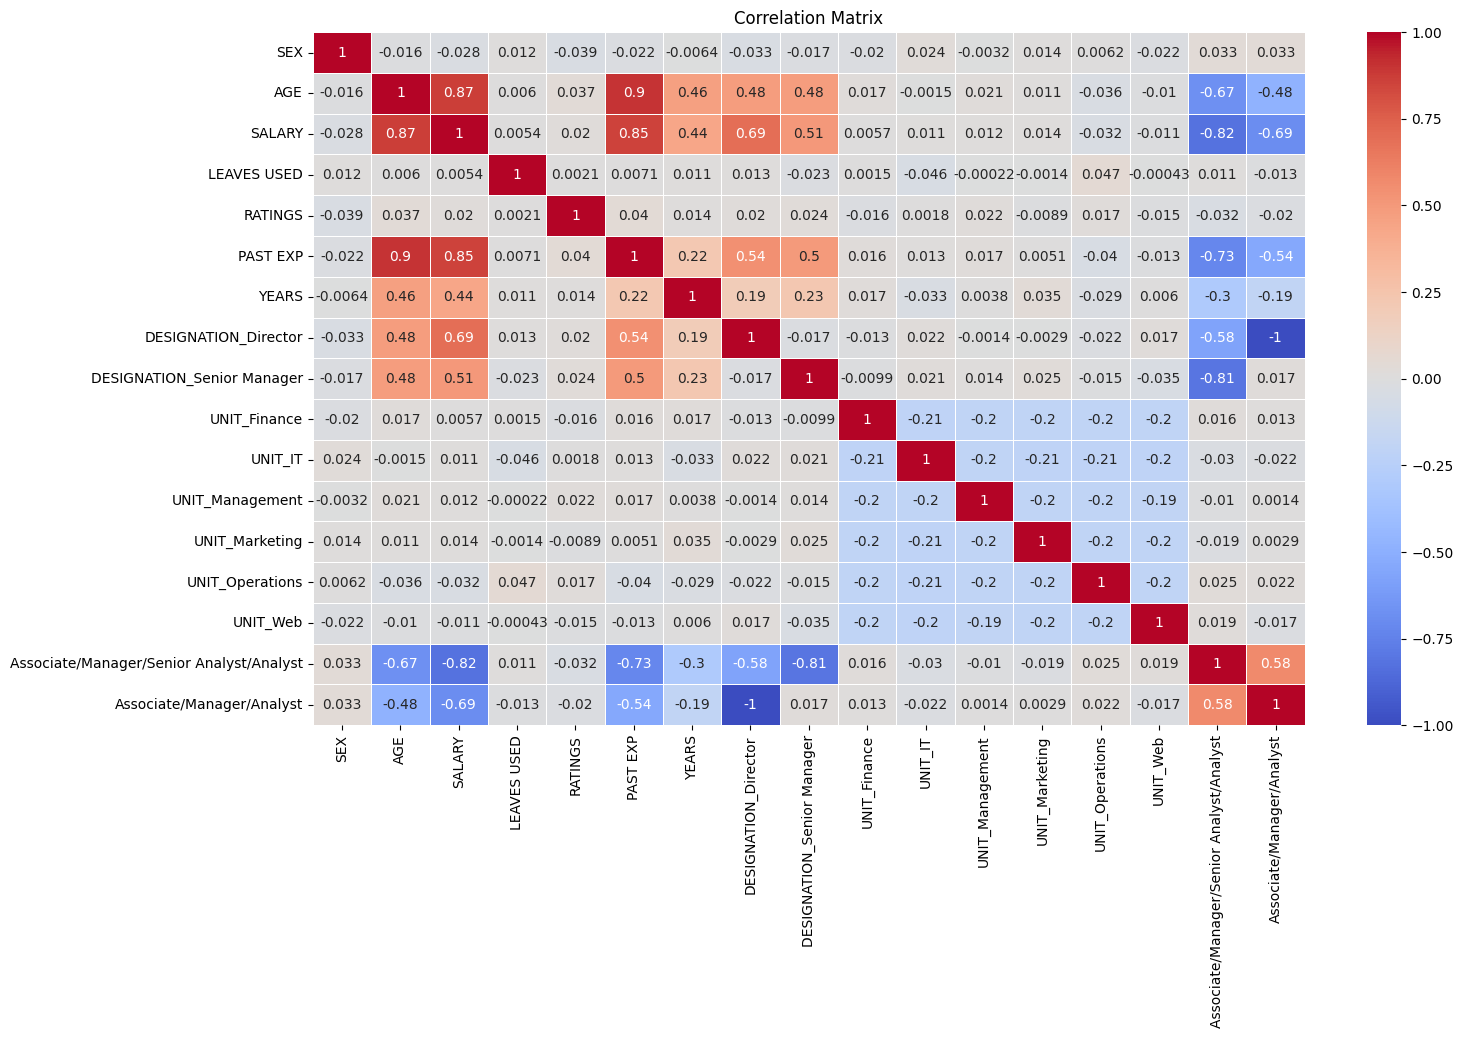

In [31]:
data["Associate/Manager/Analyst"] = data["Associate/Manager/Senior Analyst/Analyst"] + data["DESIGNATION_Senior Manager"]
plt.figure(figsize = (16,9))
cor_mat = data.corr()
sns.heatmap(cor_mat, annot = True, cmap = "coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

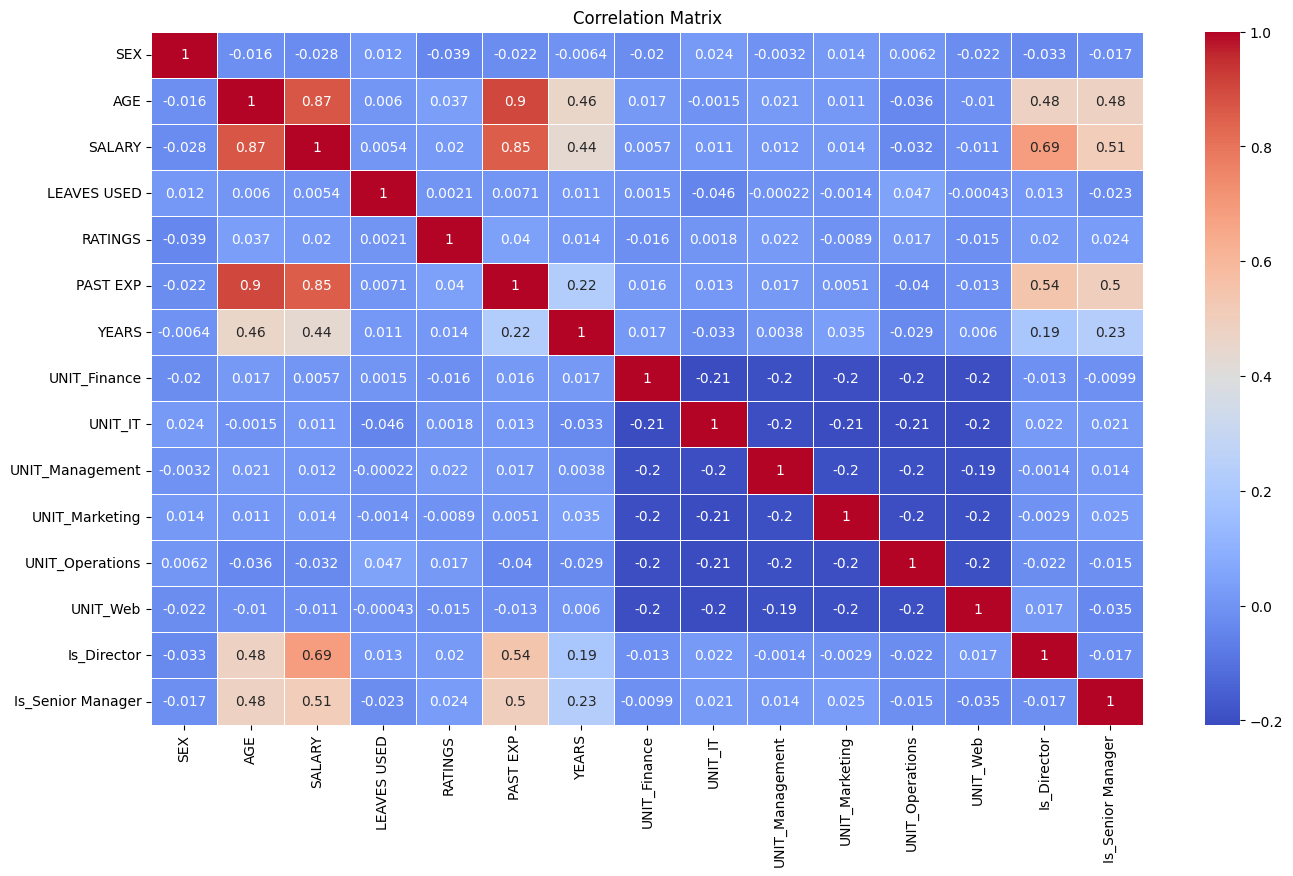

In [32]:
data["Is_Director"] = data["DESIGNATION_Director"]
data["Is_Senior Manager"] = data["DESIGNATION_Senior Manager"]
data = data.drop(["DESIGNATION_Director", "DESIGNATION_Senior Manager", "Associate/Manager/Senior Analyst/Analyst", "Associate/Manager/Analyst"], axis=1)
plt.figure(figsize = (16,9))
cor_mat = data.corr()
sns.heatmap(cor_mat, annot = True, cmap = "coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

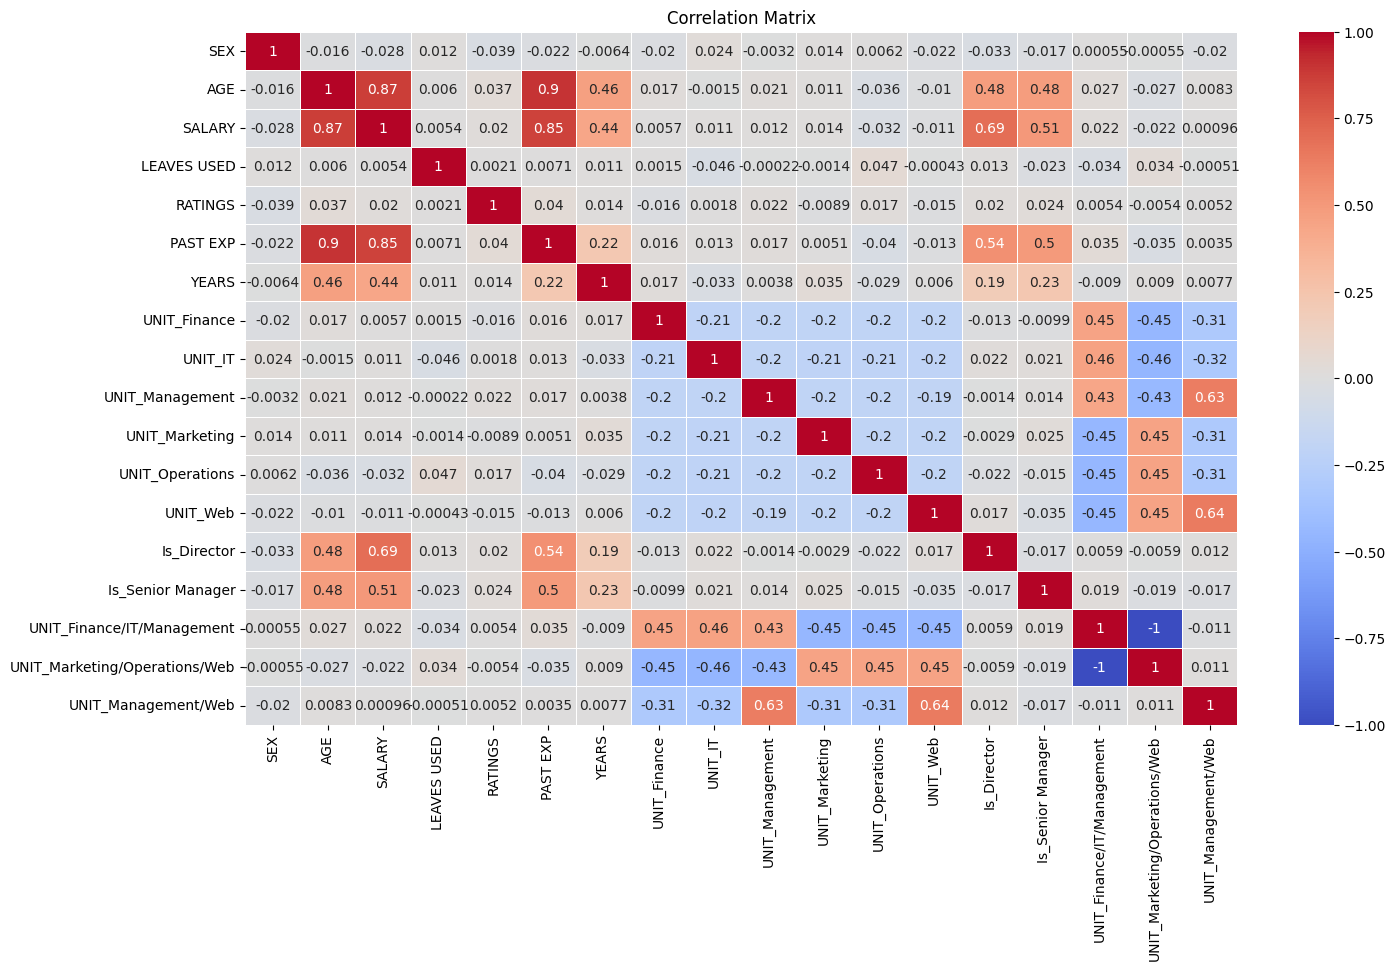

In [33]:
data["UNIT_Finance/IT/Management"] = data["UNIT_Finance"] + data["UNIT_IT"] + data["UNIT_Management"]
data["UNIT_Marketing/Operations/Web"] = data["UNIT_Marketing"] + data["UNIT_Operations"] + data["UNIT_Web"]
data["UNIT_Management/Web"] = data["UNIT_Management"] + data["UNIT_Web"]
plt.figure(figsize = (16,9))
cor_mat = data.corr()
sns.heatmap(cor_mat, annot = True, cmap = "coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

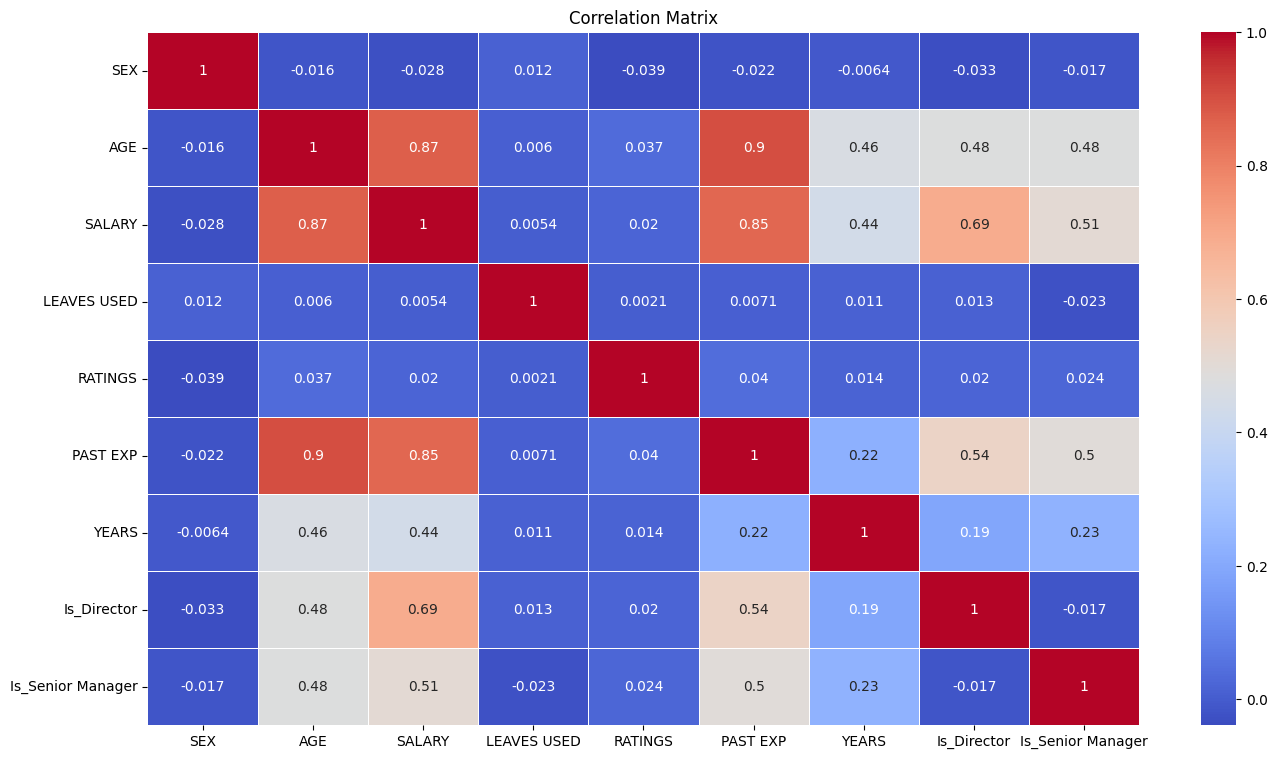

In [34]:
data = data.drop(["UNIT_Finance/IT/Management", "UNIT_Marketing/Operations/Web", "UNIT_Management/Web", "UNIT_Finance", "UNIT_IT", "UNIT_Management", "UNIT_Marketing", "UNIT_Operations", "UNIT_Web"], axis=1)
plt.figure(figsize = (16,9))
cor_mat = data.corr()
sns.heatmap(cor_mat, annot = True, cmap = "coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [35]:
data.head()

,SEX,AGE,SALARY,LEAVES USED,RATINGS,PAST EXP,YEARS,Is_Director,Is_Senior Manager
0,0,21.0,44570,24.0,2.0,0,1.639973,False,False
1,0,30.0,89207,17.0,3.0,7,3.022587,False,False
2,0,21.0,40955,23.0,3.0,0,1.445585,False,False
3,0,22.0,45550,22.0,3.0,0,2.762491,False,False
4,1,23.0,43161,27.0,3.0,3,1.130732,False,False


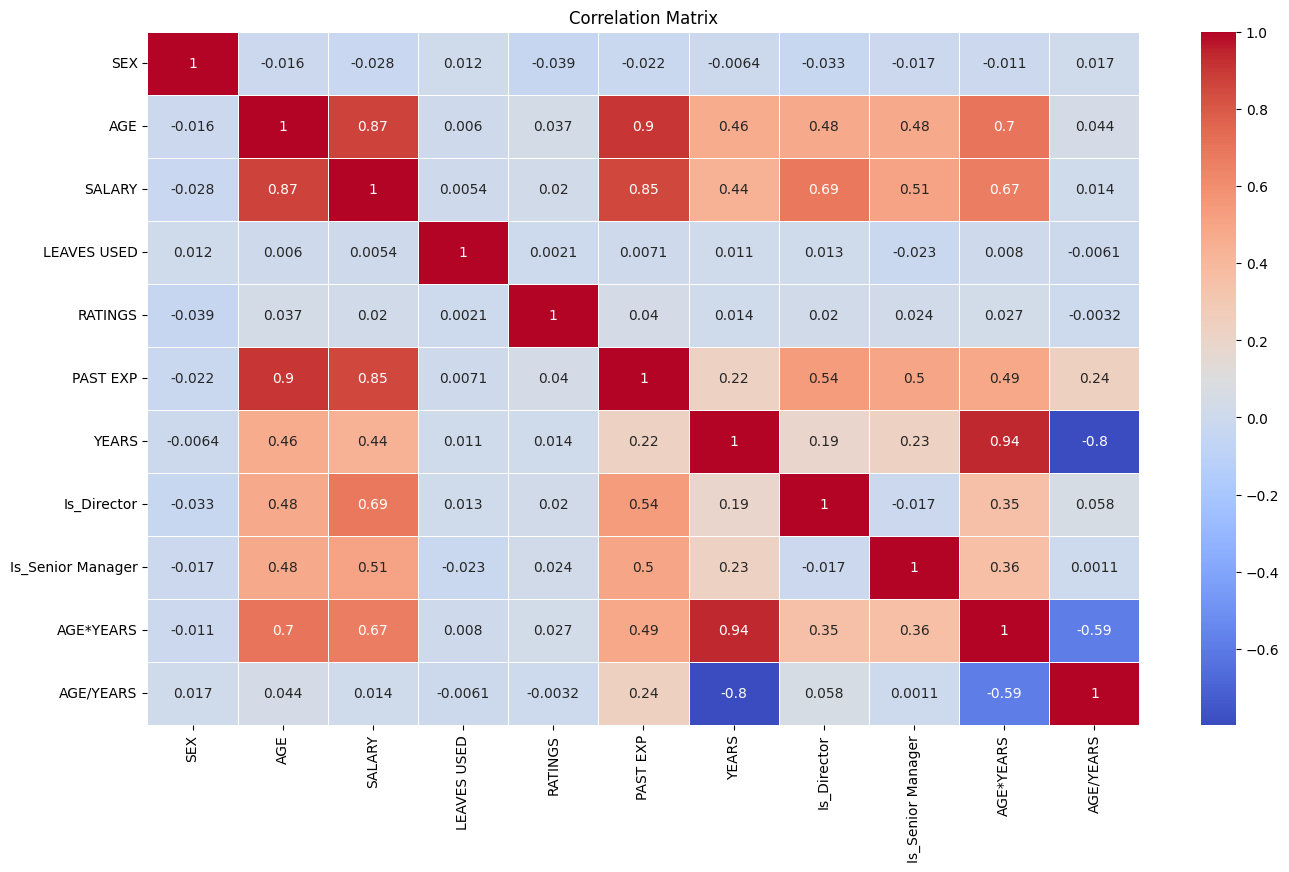

In [36]:
data["AGE*YEARS"] = data["AGE"]*data["YEARS"]
data["AGE/YEARS"] = data["AGE"]/data["YEARS"]
plt.figure(figsize = (16,9))
cor_mat = data.corr()
sns.heatmap(cor_mat, annot = True, cmap = "coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

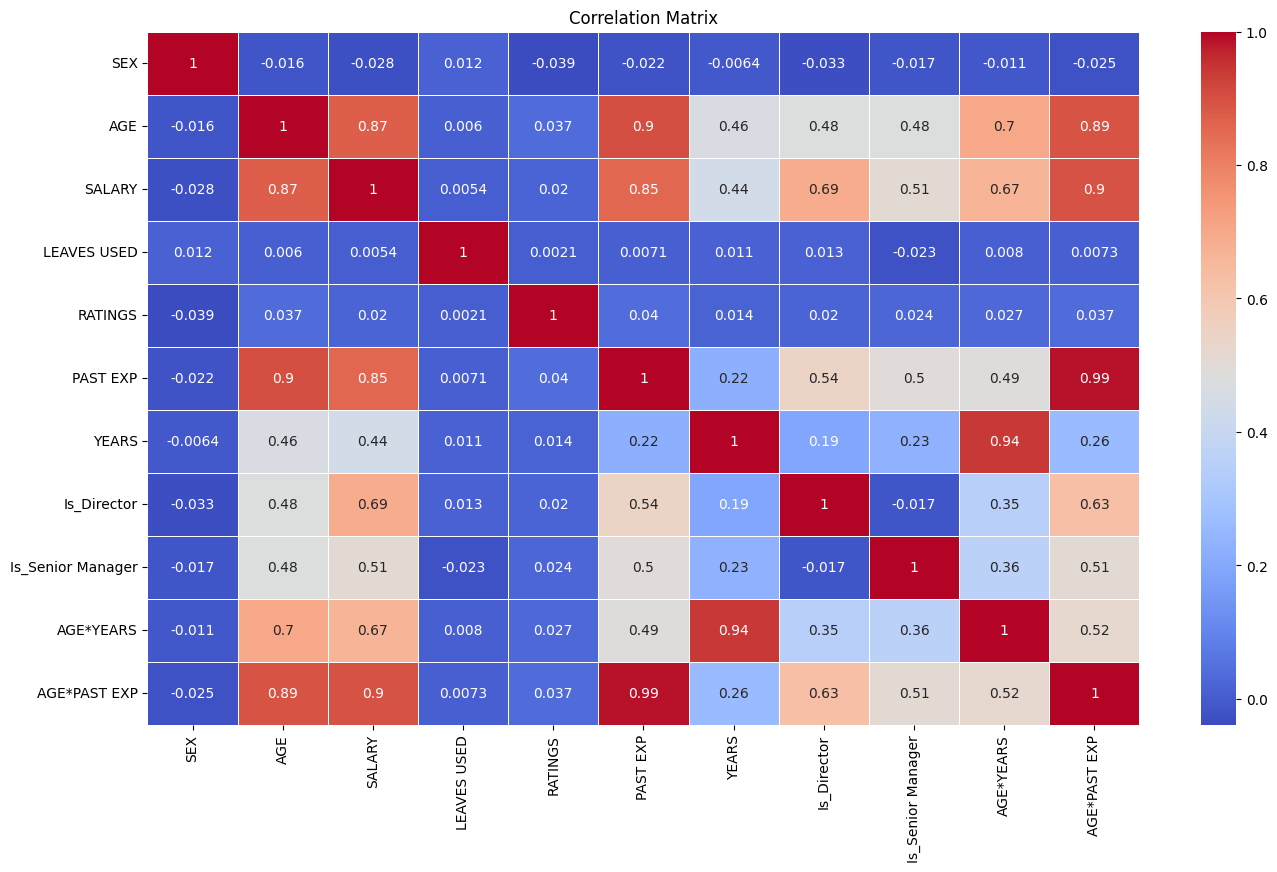

In [37]:
data = data.drop("AGE/YEARS", axis = 1)
data["AGE*PAST EXP"] = data["AGE"]*data["PAST EXP"]
plt.figure(figsize = (16,9))
cor_mat = data.corr()
sns.heatmap(cor_mat, annot = True, cmap = "coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

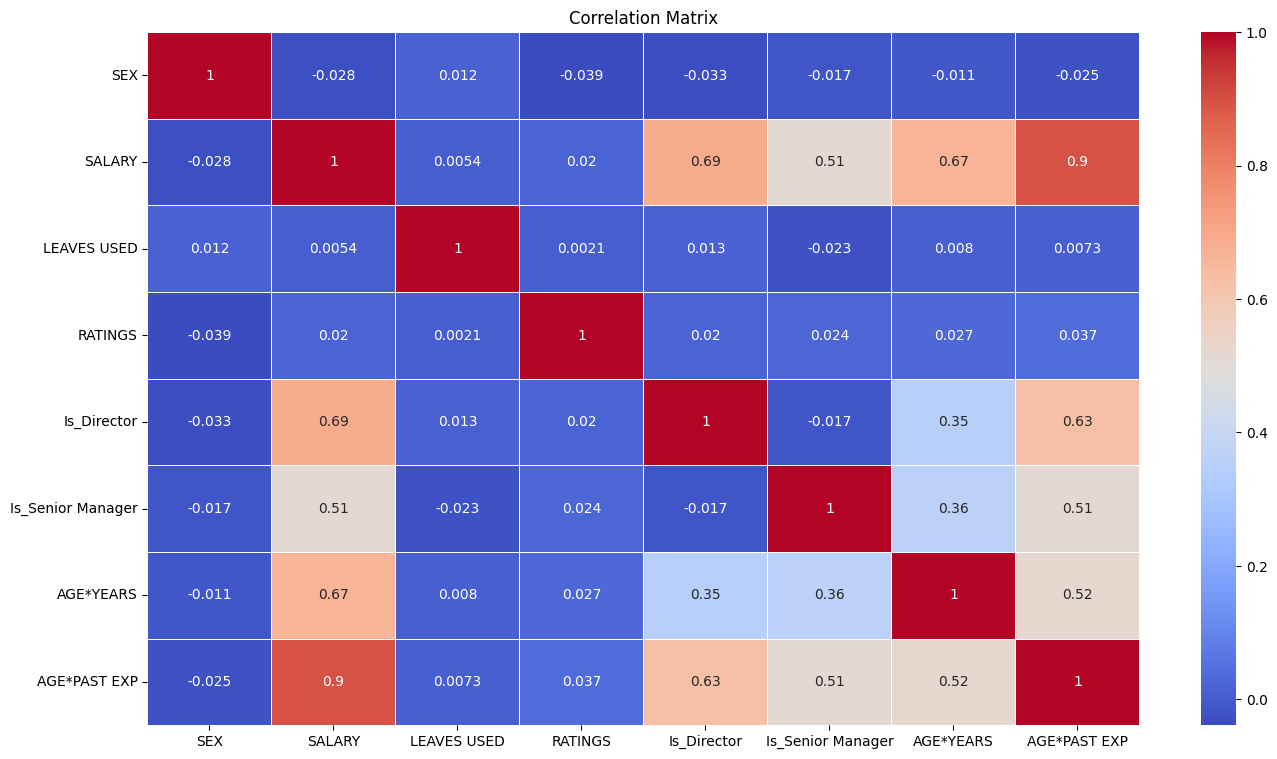

In [38]:
data = data.drop(["AGE", "PAST EXP", "YEARS"], axis=1)
plt.figure(figsize = (16,9))
cor_mat = data.corr()
sns.heatmap(cor_mat, annot = True, cmap = "coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [39]:
data.head()

,SEX,SALARY,LEAVES USED,RATINGS,Is_Director,Is_Senior Manager,AGE*YEARS,AGE*PAST EXP
0,0,44570,24.0,2.0,False,False,34.439425,0.0
1,0,89207,17.0,3.0,False,False,90.677618,210.0
2,0,40955,23.0,3.0,False,False,30.357290,0.0
3,0,45550,22.0,3.0,False,False,60.774812,0.0
4,1,43161,27.0,3.0,False,False,26.006845,69.0


MACHINE LEARNING MODEL DEVELOPMENT

In [40]:
x = data.drop("SALARY", axis=1)
y = data["SALARY"]

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1106)

In [42]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_pred = lm.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [43]:
print("Mean Squared ERROR: ", mse)
print("Root Mean Squared ERROR: ", rmse)
print("Mean Absolute ERROR: ", mae) 
print("R - Squared: ", r2)

Mean Squared ERROR:  131644399.37639919
Root Mean Squared ERROR:  11473.639325706521
Mean Absolute ERROR:  7021.403742479365
R - Squared:  0.899279313133119


In [44]:
dc = DecisionTreeRegressor()
dc.fit(x_train, y_train)
y_pred = dc.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [45]:
print("Mean Squared ERROR: ", mse)
print("Root Mean Squared ERROR: ", rmse)
print("Mean Absolute ERROR: ", mae)
print("R - Squared: ", r2)

Mean Squared ERROR:  119628474.18939394
Root Mean Squared ERROR:  10937.480248640175
Mean Absolute ERROR:  6279.359848484848
R - Squared:  0.908472657049831


In [46]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [47]:
print("Mean Squared ERROR: ", mse)
print("Root Mean Squared ERROR: ", rmse)
print("Mean Absolute ERROR: ", mae)
print("R - Squared: ", r2)

Mean Squared ERROR:  79648004.09241244
Root Mean Squared ERROR:  8924.573048186252
Mean Absolute ERROR:  5242.019481376264
R - Squared:  0.9390615801525536


In [48]:
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [49]:
print("Mean Squared ERROR: ", mse)
print("Root Mean Squared ERROR: ", rmse)
print("Mean Absolute ERROR: ", mae)
print("R - Squared: ", r2)

Mean Squared ERROR:  89752528.97636488
Root Mean Squared ERROR:  9473.781134075502
Mean Absolute ERROR:  5217.941214759035
R - Squared:  0.9313306421742105


In [50]:
dump(rf, "Dragon.joblib")

['Dragon.joblib']